<a href="https://colab.research.google.com/github/kavyaagarwal178/intel_image_classification/blob/main/Intel_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import google drive**

In [4]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


**Display the contents of the drive**

In [5]:
!ls "/content/drive/My Drive"

'Bird Speciees Dataset'  'Colab Notebooks'   Plant_images_pianalytix   test_data.csv
 bird_species.h5	  Data		     plant_model.json	       train_data.csv
 Certificates		  plant_disease.h5   plant_model_weights.h5


**Install keras-applications**

In [6]:
!pip install keras-applications
!pip install keras.layers.normalization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.4 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement keras.layers.normalization (from versions: none)
ERROR: No matching distribution found for keras.layers.normalization


**Import the libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from PIL import Image
from keras.models import Sequential
from keras.layers import BatchNormalization
from tensorflow.keras.layers import BatchNormalization

from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU
from sklearn.model_selection import train_test_split

**Displaying the content**

In [7]:
!ls "/content/drive/MyDrive/Data"

'Intel Image Dataset'


**Plot the images**

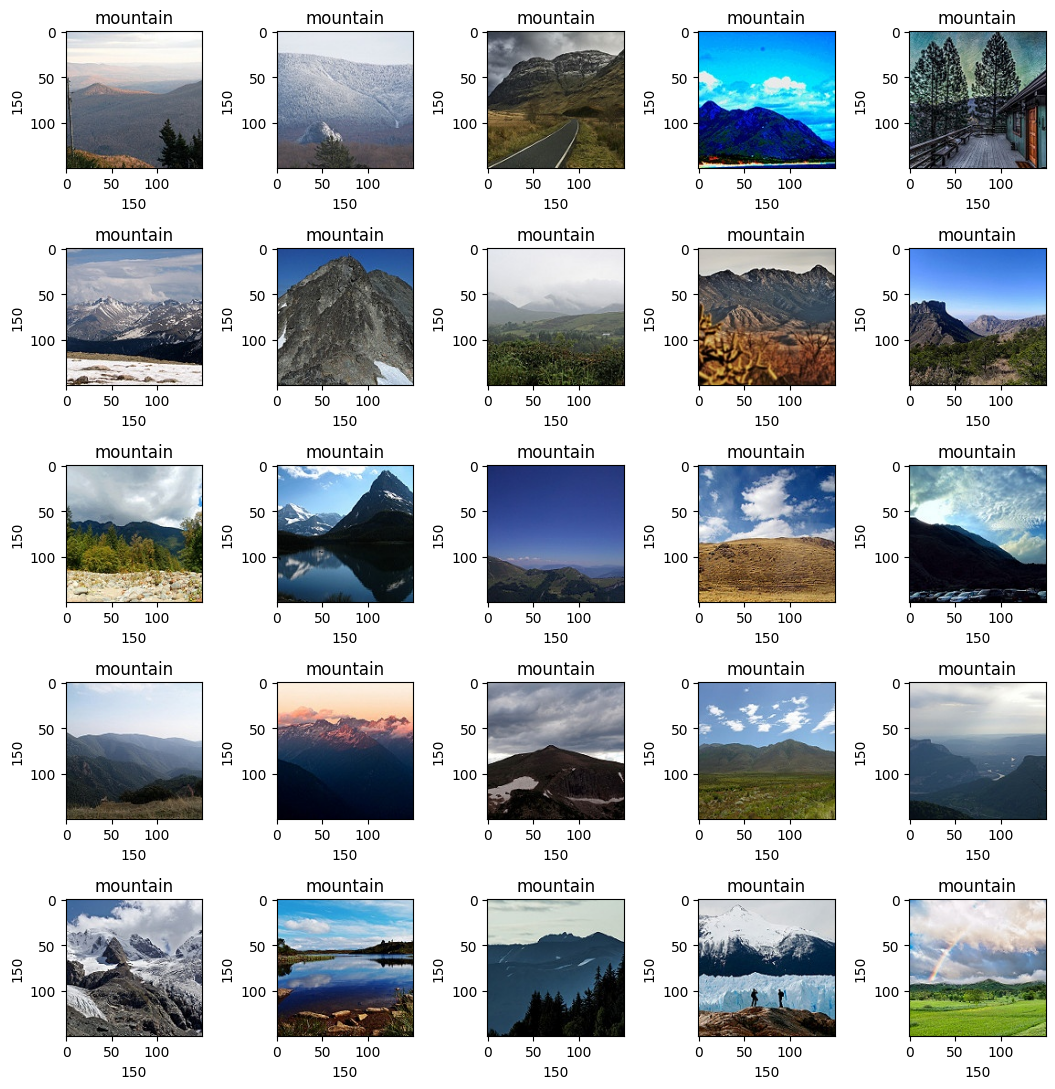

In [8]:
plt.figure(figsize=(11,11))
path = "/content/drive/MyDrive/Data/Intel Image Dataset/mountain"
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.title('mountain')
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

**Creating empty lists**

In [9]:
dir = "/content/drive/MyDrive/Data/Intel Image Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []


**Read and resize the images and convert it into array**

In [10]:
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = Image.open(image_path)
    image = image.resize((150,150)) # All images does not have same dimension
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)



**Check for images per class**

In [11]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

glacier      553
mountain     525
sea          510
street       501
forest       474
buildings    437
dtype: int64

**Storing the number of classes which will be used further in model architecture**

In [12]:
num_classes = len(label_counts)
num_classes

6

**Check the shape of the x data**

In [13]:
np.array(image_list).shape

(3000, 150, 150, 3)

**Check the shape of the y data**

In [14]:
label_list = np.array(label_list)
label_list.shape

(3000,)

**Train the model**

In [15]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

**Reshape the data**

In [16]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 150,150,3)
x_test = x_test.reshape( -1, 150,150,3)

**Here we will use label binarizer to one hot encode our y data. We will also print the sequence of the classes.**

In [17]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


**Now we will split the training data to validation and training data**

In [18]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

**Create a network architecture for the model. different types of layers according to their features used :-**

**1- BatchNormalization**

**2- LeakyRelu**

**3- Conv_2d**

**4- max_pooling2d**

**5- flatten**

**6- Dense**

**7- softmax**

In [19]:
# Creating model architecture
model = Sequential([
        Conv2D(16, kernel_size = (3,3), input_shape = (150,150,3)),
        BatchNormalization(),
        LeakyReLU(),

        Conv2D(32, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),

        Conv2D(64, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),

        Conv2D(128, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),

        Flatten(),

        Dense(64),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(),

        Dense(32),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(),

        Dense(16),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(1),

        Dense(6, activation = 'softmax')
        ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 16)      64        
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 148, 148, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      4640      
                                                                 
 batch_normalization_1 (Bat  (None, 146, 146, 32)      128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 146, 146, 32)      0

**Compiling the model**

In [20]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005),metrics=['accuracy'])

**Fitting the model with the data and finding out the accuracy at each epoch to see how our model is learning. Now we will train our model on 70 epochs and a batch size of 128. You can try using more number of epochs to increase accuracy. During each epochs we can see how the model is performing by viewing the training and validation accuracy.**

In [21]:
epochs = 70
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/70
15/15 [==============================] - 150s 10s/step - loss: 1.5148 - accuracy: 0.3974 - val_loss: 1.9296 - val_accuracy: 0.1937
Epoch 2/70
15/15 [==============================] - 145s 10s/step - loss: 1.1436 - accuracy: 0.5620 - val_loss: 2.1779 - val_accuracy: 0.2000
Epoch 3/70
15/15 [==============================] - 148s 10s/step - loss: 0.9828 - accuracy: 0.6344 - val_loss: 2.1718 - val_accuracy: 0.2708
Epoch 4/70
15/15 [==============================] - 163s 11s/step - loss: 0.8827 - accuracy: 0.6927 - val_loss: 2.2200 - val_accuracy: 0.2250
Epoch 5/70
15/15 [==============================] - 139s 9s/step - loss: 0.7920 - accuracy: 0.7359 - val_loss: 2.4031 - val_accuracy: 0.2313
Epoch 6/70
15/15 [==============================] - 120s 8s/step - loss: 0.7496 - accuracy: 0.7417 - val_loss: 2.3252 - val_accuracy: 0.2000
Epoch 7/70
15/15 [==============================] - 119s 8s/step - loss: 0.6741 - accuracy: 0.7802 - val_loss: 2.3335 - val_accuracy: 0.2021
Epoch 8/7

**Saving the model**

In [22]:
model.save("/content/drive/My Drive/intel_image.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Plot the graph for training history**

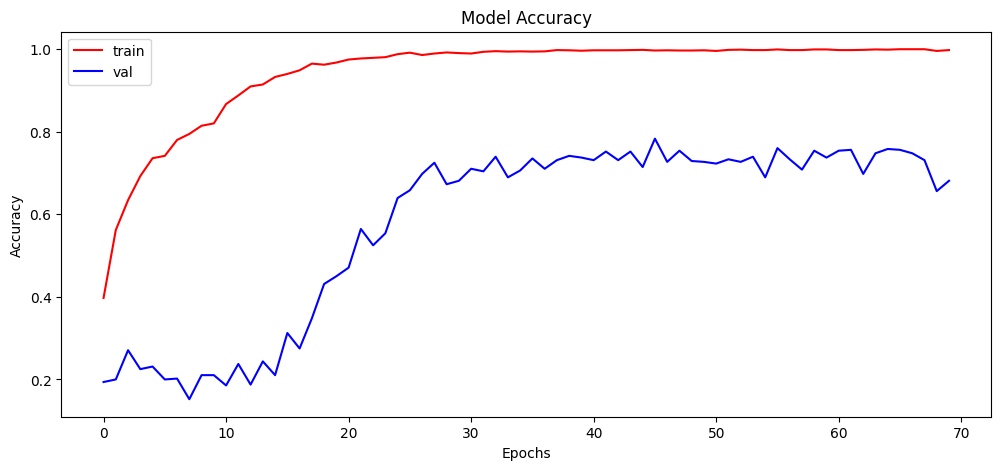

In [23]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

**Plot the loss of the model for the training history**



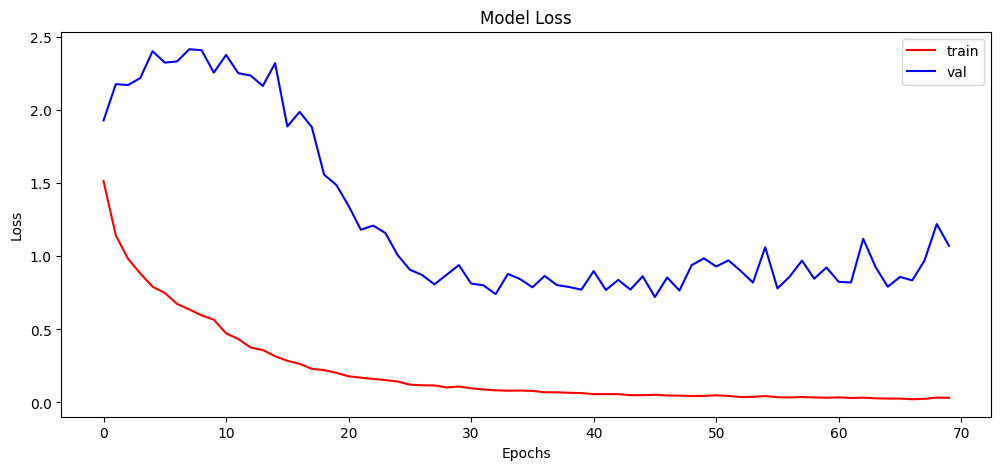

In [24]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

**Accuracy of the model**

In [25]:
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

19/19 [==============================] - 12s 652ms/step - loss: 1.0276 - accuracy: 0.7033
Test Accuracy: 70.333331823349


**Storing Model predictions**

In [26]:
y_pred = model.predict(x_test)

19/19 [==============================] - 11s 555ms/step


**Visualizing an image to be predicted in further steps**

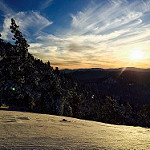

In [27]:
img = array_to_img(x_test[1])
img

**Create list of labels using object of label binarizer and will print it**

In [28]:
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[1])])
print("Predicted : ",labels[np.argmax(y_pred[1])])

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']
Originally :  mountain
Predicted :  mountain
